In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<function matplotlib.pyplot.show(close=None, block=None)>

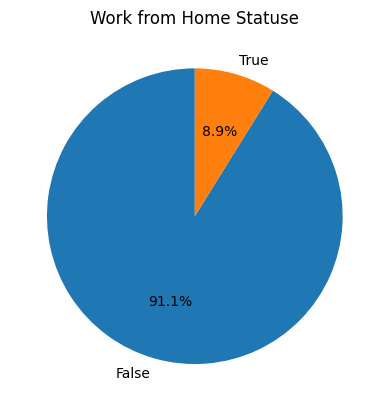

In [4]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle =90, autopct='%1.1f%%')
plt.title('Work from Home Statuse')
plt.ylabel("")
plt.show

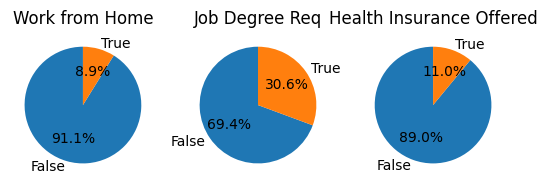

In [15]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct="%1.1f%%", labels= ('False','True'))
    #labels musza byc podane w poprawnej kolejnosci
    ax[i].set_title(title)

plt.show()

In [15]:
df_pivo = df.explode('job_skills').copy()
df_pivo = df_pivo[df_pivo['job_title_short']=='Data Analyst']

df_pivo = df_pivo.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)

df_pivo = df_pivo.sort_values(by='skill_count',ascending=False).head(20)

df_pivo

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


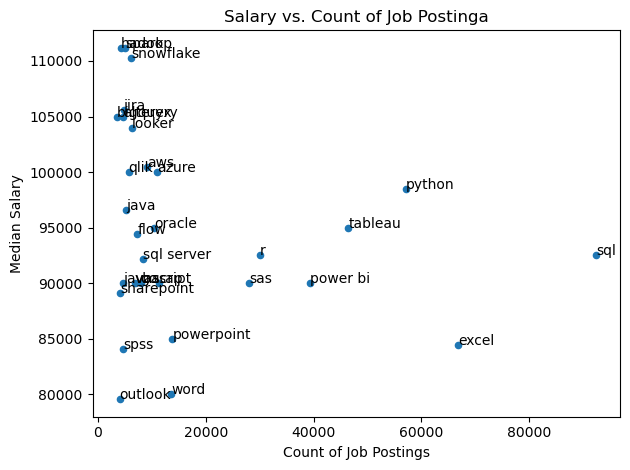

In [9]:
df_pivo.plot(kind='scatter',x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.title('Salary vs. Count of Job Postinga')
plt.tight_layout()

for i, txt in enumerate(df_pivo.index):
    plt.text(df_pivo['skill_count'].iloc[i],df_pivo['median_salary'].iloc[i],txt)

plt.show()


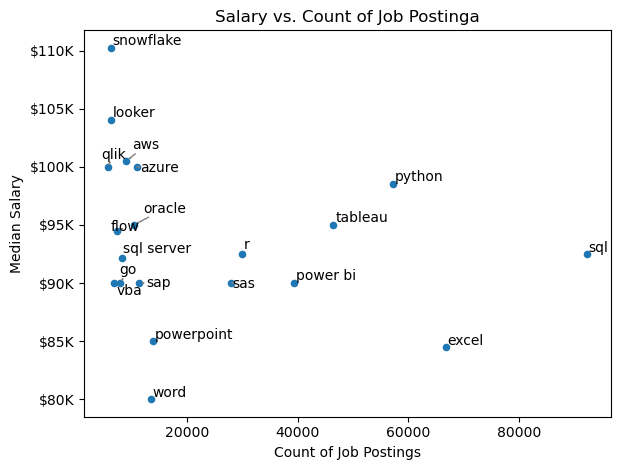

In [26]:
#fig, ax = plt.sublots() - getting axis



from adjustText import adjust_text

df_pivo.plot(kind='scatter',x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.title('Salary vs. Count of Job Postinga')
plt.tight_layout()


texts=[]
for i, txt in enumerate(df_pivo.index):
    texts.append(plt.text(df_pivo['skill_count'].iloc[i],df_pivo['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color ='grey',lw=1))

ax = plt.gca() #inna opcja getting axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))
#musimy uzyc FuncFormatter do zmiany osi, a do tego potrzebujemy axis


plt.show()
